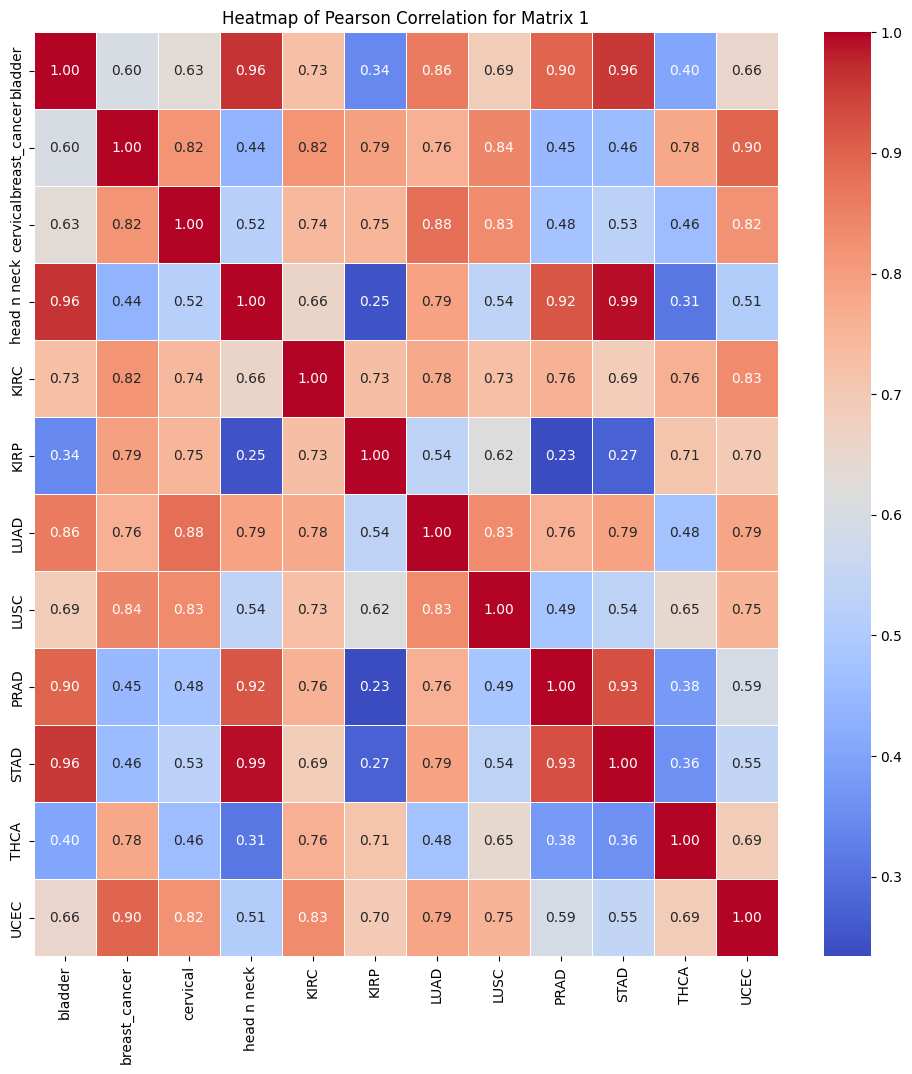

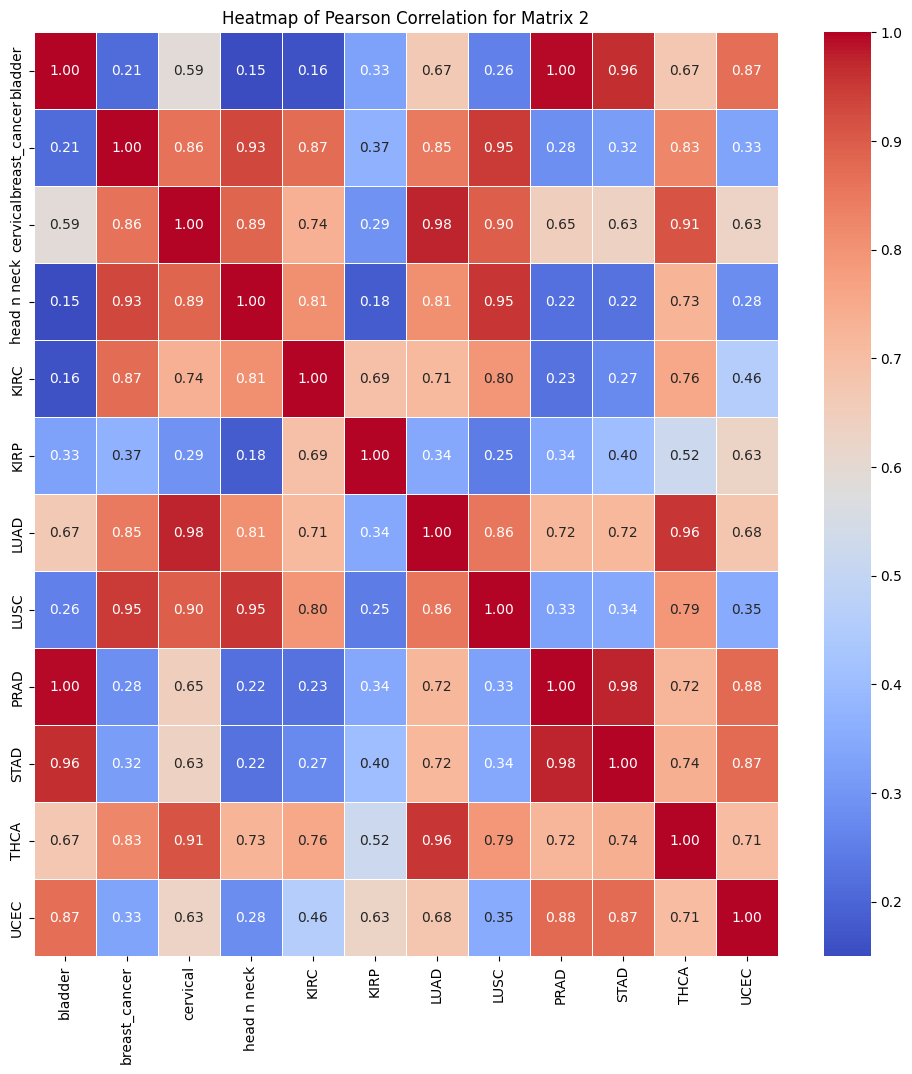

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files  # For downloading files

# Upload the files and give path
mt1_path = "/content/matrix1.txt"
mt2_path = "/content/matrix2.txt"

# Load data into Data Frames
mt1_data = pd.read_csv(mt1_path, sep='\t', index_col=0)
mt2_data = pd.read_csv(mt2_path, sep='\t', index_col=0)

# Drop non-cancer columns
mt1_data = mt1_data.iloc[:, :-1]
mt2_data = mt2_data.iloc[:, :-1]

# Convert non-numeric values to NaN and remove them
mt1_data = mt1_data.apply(pd.to_numeric, errors='coerce')
mt2_data = mt2_data.apply(pd.to_numeric, errors='coerce')

# Drop NaN values
mt1_data.dropna(inplace=True)
mt2_data.dropna(inplace=True)

# Ensure both matrices have the same shape
min_rows = min(mt1_data.shape[0], mt2_data.shape[0])
mt1_data = mt1_data.iloc[:min_rows, :]
mt2_data = mt2_data.iloc[:min_rows, :]

# Compute Pearson correlation matrices
correlation_mt1 = mt1_data.corr(method='pearson')
correlation_mt2 = mt2_data.corr(method='pearson')

# Save correlation matrices to CSV
correlation_mt1.to_csv("/content/correlation_matrix1.csv")
correlation_mt2.to_csv("/content/correlation_matrix2.csv")

# Plot heatmaps
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

plot_heatmap(correlation_mt1, "Heatmap of Pearson Correlation for Matrix 1")
plot_heatmap(correlation_mt2, "Heatmap of Pearson Correlation for Matrix 2")

# Compute cancer-specific correlations between matrix1 and matrix2
correlation_btw_matrices = {}
for column in mt1_data.columns:
    if column in mt2_data.columns:  # Ensure column exists in both matrices
        correlation = mt1_data[column].corr(mt2_data[column], method='pearson')
        correlation_btw_matrices[column] = correlation

# Convert cancer-specific correlations to DataFrame
df_cancer_specific_correlations = pd.DataFrame(
    list(correlation_btw_matrices.items()),
    columns=['Cancer Type', 'Correlation']
)

# Compute overall correlation between the two matrices
overall_correlation = np.corrcoef(mt1_data.values.flatten(), mt2_data.values.flatten())[0, 1]

# Append overall correlation to the DataFrame
overall_correlation_row = pd.DataFrame([['Overall', overall_correlation]], columns=['Cancer Type', 'Correlation'])
df_cancer_specific_correlations = pd.concat([df_cancer_specific_correlations, overall_correlation_row], ignore_index=True)

# Save combined cancer-specific and overall correlations to CSV
overall_correlation_output_path = "/content/overall_correlations_data.csv"
df_cancer_specific_correlations.to_csv(overall_correlation_output_path, index=False)

# Auto-download files
files.download("/content/correlation_matrix1.csv")
files.download("/content/correlation_matrix2.csv")
files.download(overall_correlation_output_path)



